# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [1]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 86.2MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 175MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 171MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 261MB/s]

100%|██████████| 170M/170M [00:00<00:00, 295MB/s]



# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 52.2ms
Speed: 0.7ms pre-process, 52.2ms inference, 697.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


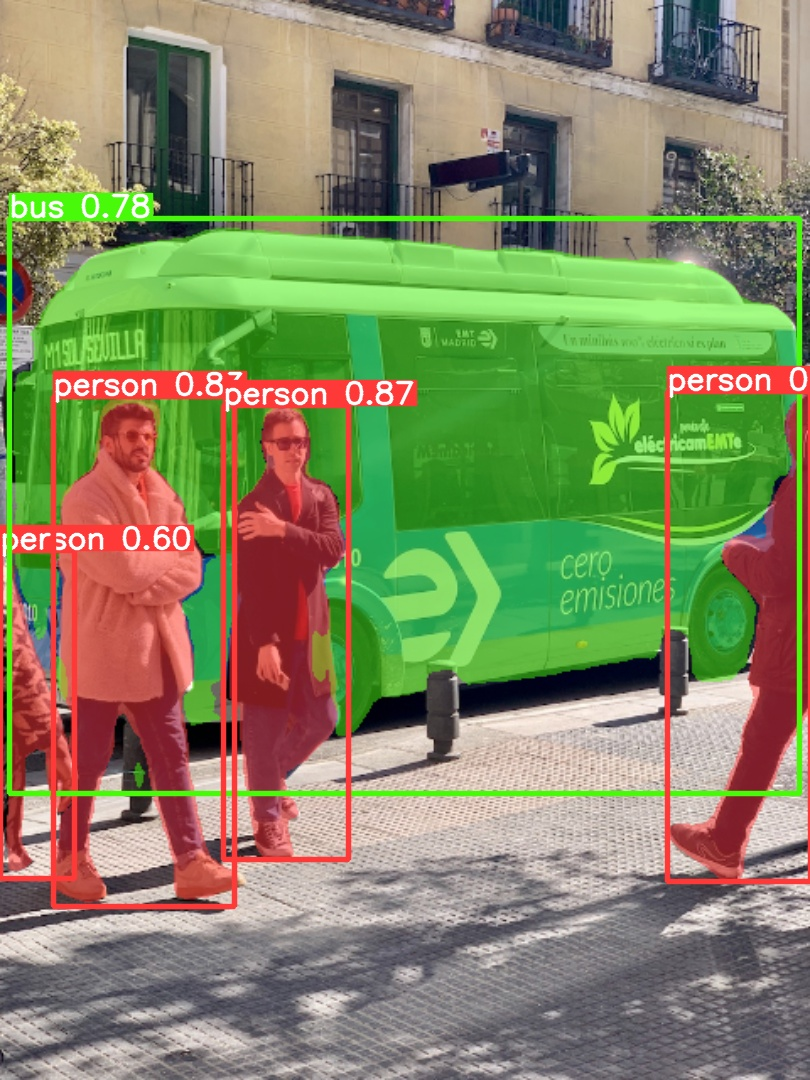

In [ ]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

Different people were selected accurately with their labels at the top of their bounding boxes. Buses were also segmented accurately. Each of their pixel are colored accordingly.

# 2. Infer on COCO image

In [ ]:
#Download example image
import requests
image_url = "https://i.imgur.com/EbOBS5l.jpeg"
query = "selenium"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}
response = requests.get(image_url, headers=headers)
response.raise_for_status()
with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 53.8ms
Speed: 0.6ms pre-process, 53.8ms inference, 955.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco


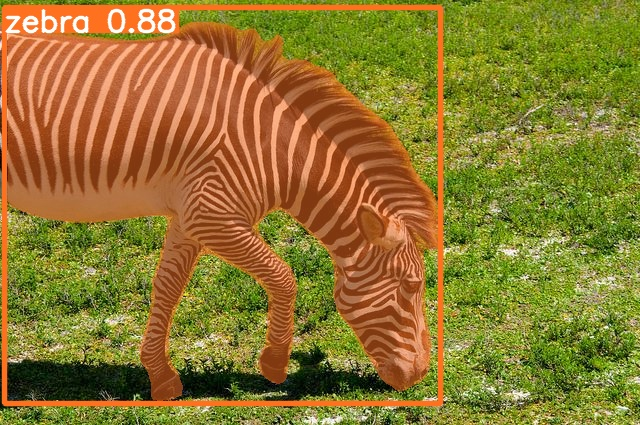

In [ ]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

The zebra bounding box was generated. Inside it, the pixels of the zebra were colored with orange. It isolated or segmented the zebra from the image. It also has a high confidence of 88%.

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q -y {HOME}/tmp.zip -d  {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 88.3MB/s]

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.9M/14.9M [00:00<00:00, 139MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 91.2MB/s]
Dataset download success ✅ (0.7s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 988.09it/s]
val: New cache created: /content/datasets/coco128-

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [3]:
%cd {HOME}/yolov5
!pip install roboflow

#from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR API KEY")

/content/yolov5


In [4]:
%cd {HOME}/yolov5
from roboflow import Roboflow
rf = Roboflow(api_key="6MU7P8GYBpgYpRFDQuAW")
project = rf.workspace("virginia-tech-smbuc").project("rockpaperscissors2-2ba5y")
version = project.version(7)
dataset = version.download("yolov5")


/content/yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RockPaperScissors2-7 in yolov5pytorch:: 100%|██████████| 1848/1848 [00:00<00:00, 8749.59it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- paper
- rock
- scissors
nc: 3
roboflow:
  license: CC BY 4.0
  project: rockpaperscissors2-2ba5y
  url: https://universe.roboflow.com/virginia-tech-smbuc/rockpaperscissors2-2ba5y/dataset/7
  version: 7
  workspace: virginia-tech-smbuc
test: ../test/images
train: RockPaperScissors2-7/train/images
val: RockPaperScissors2-7/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [5]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset

/content/yolov5
2024-03-31 10:56:23.984877: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 10:56:23.985021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 10:56:24.115441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/RockPaperScissors2-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, singl

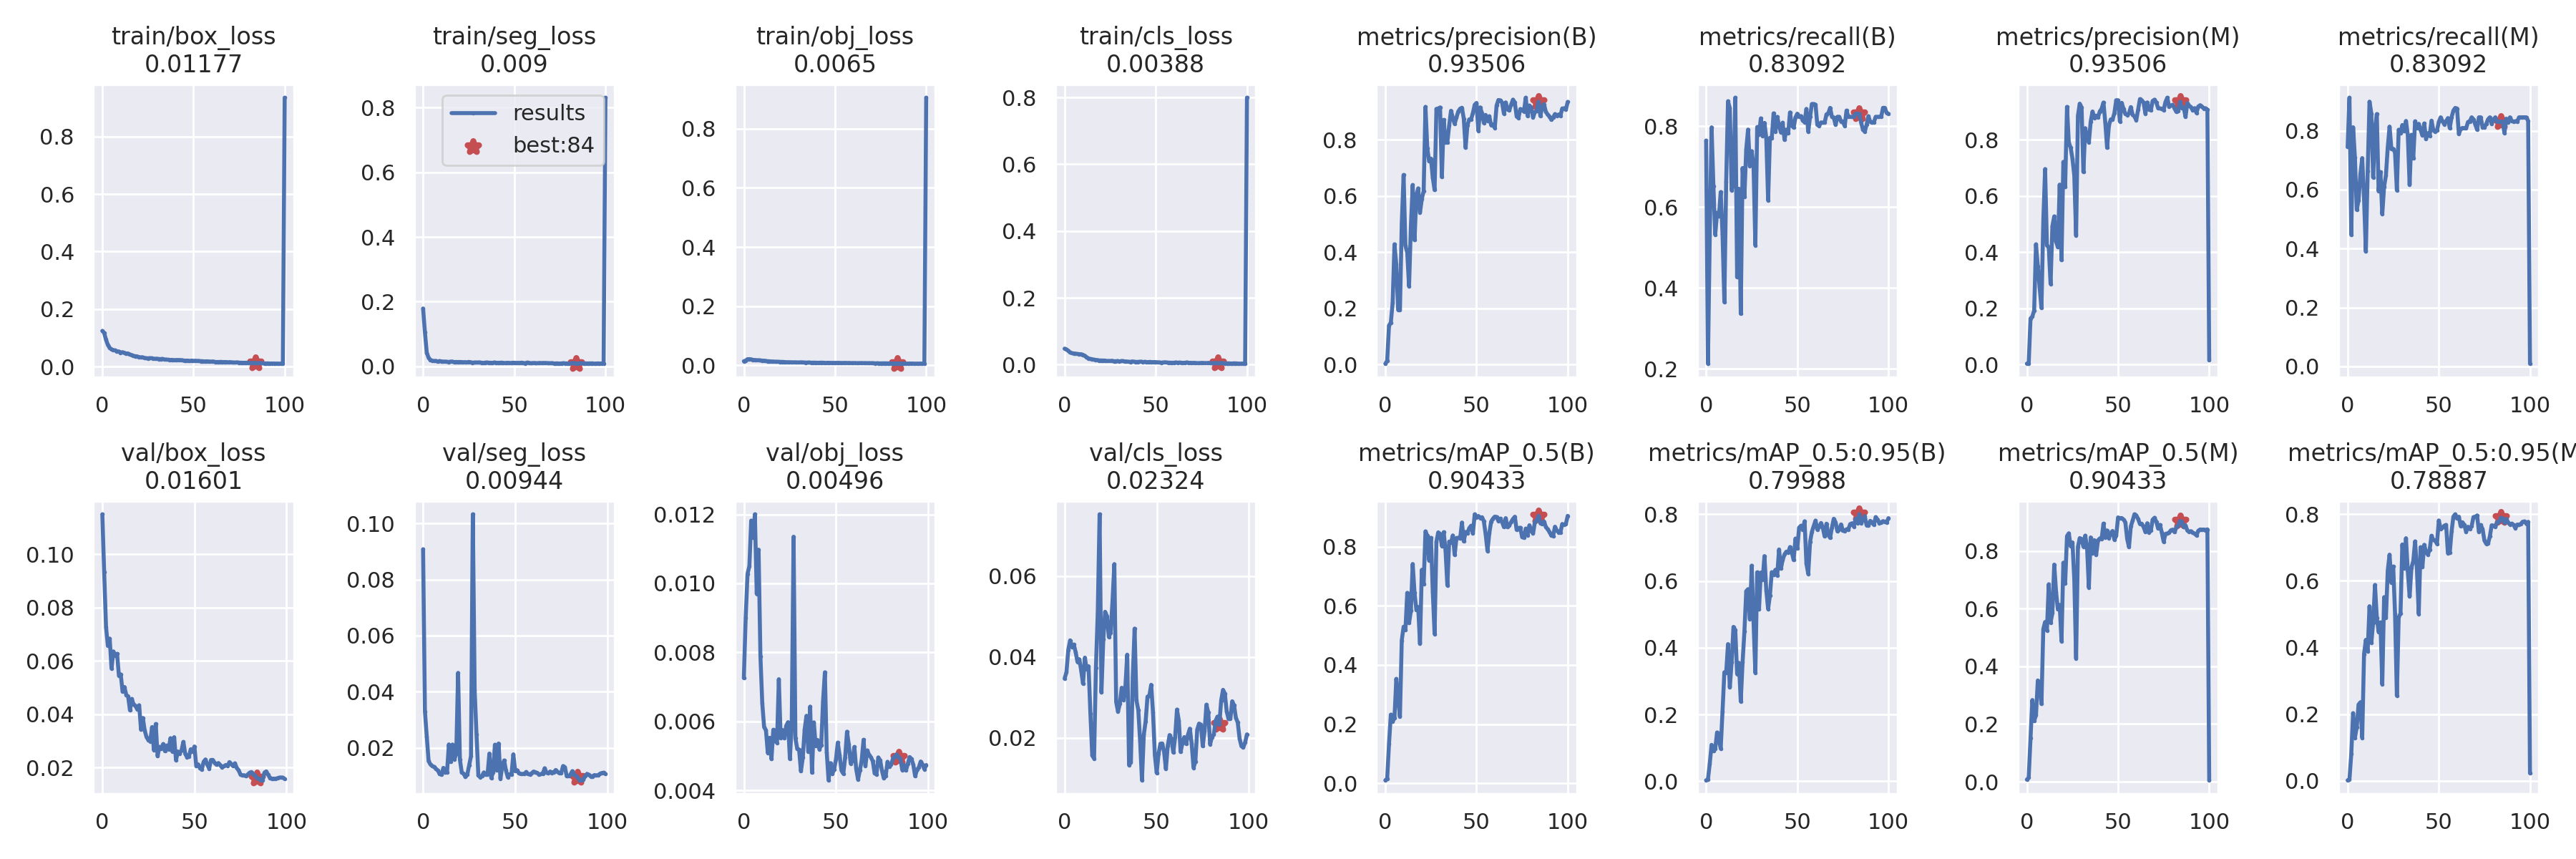

In [6]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

Various losses goes down as the model trains with more epochs. In addition, mAP increases as the number of epoch increases.  

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [7]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/RockPaperScissors2-7/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/RockPaperScissors2-7/valid/labels.cache... 57 images, 0 backgrounds, 0 corrupt: 100% 57/57 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.45s/it]
                   all         57         59      0.935  

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/RockPaperScissors2-7/test/images/paper-hires2_png_jpg.rf.89a30417fc33af2dc6a0722f621ec10b.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/RockPaperScissors2-7/test/images/paper-hires2_png_jpg.rf.89a30417fc33af2dc6a0722f621ec10b.jpg: 

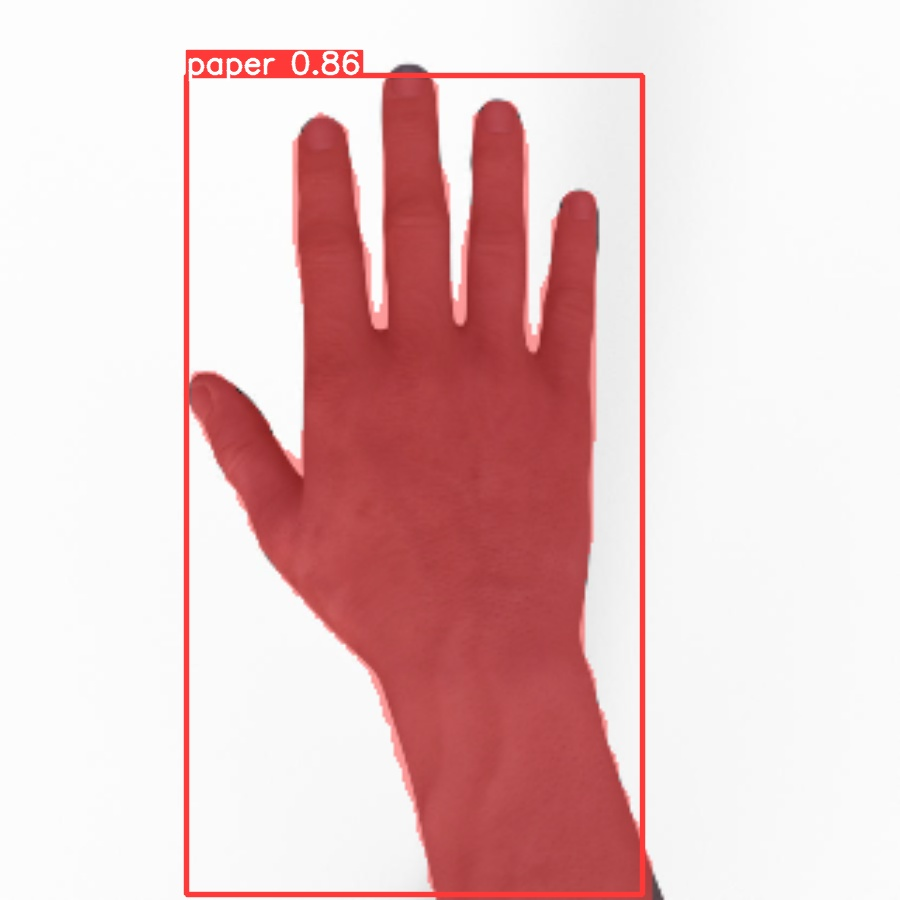

In [12]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[10]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [55]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
import requests
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://i.imgur.com/mHRu3jh.jpeg",
    "https://i.imgur.com/GUjexc0.jpeg"
    ]
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url, headers=headers)

    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

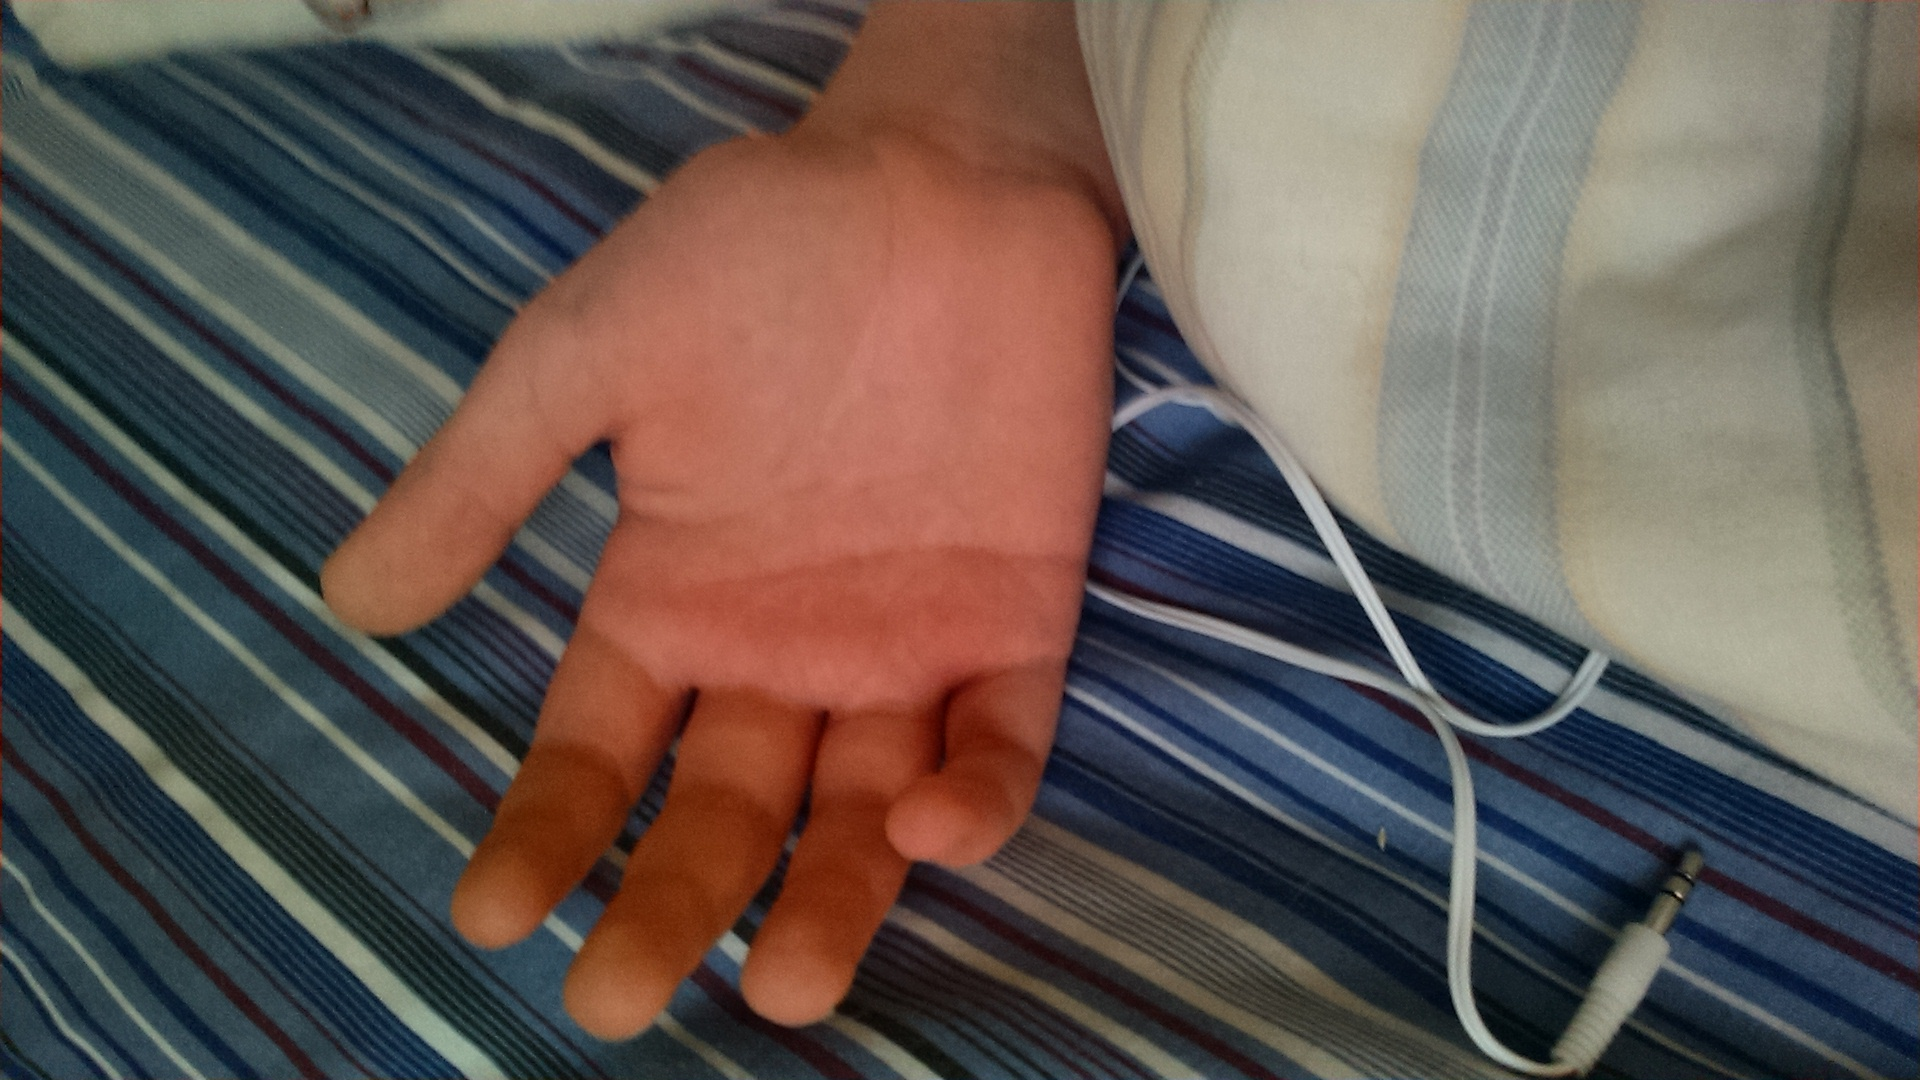

In [35]:
display.Image(filename=f"/content/example_images/example_0.jpg", width=600)

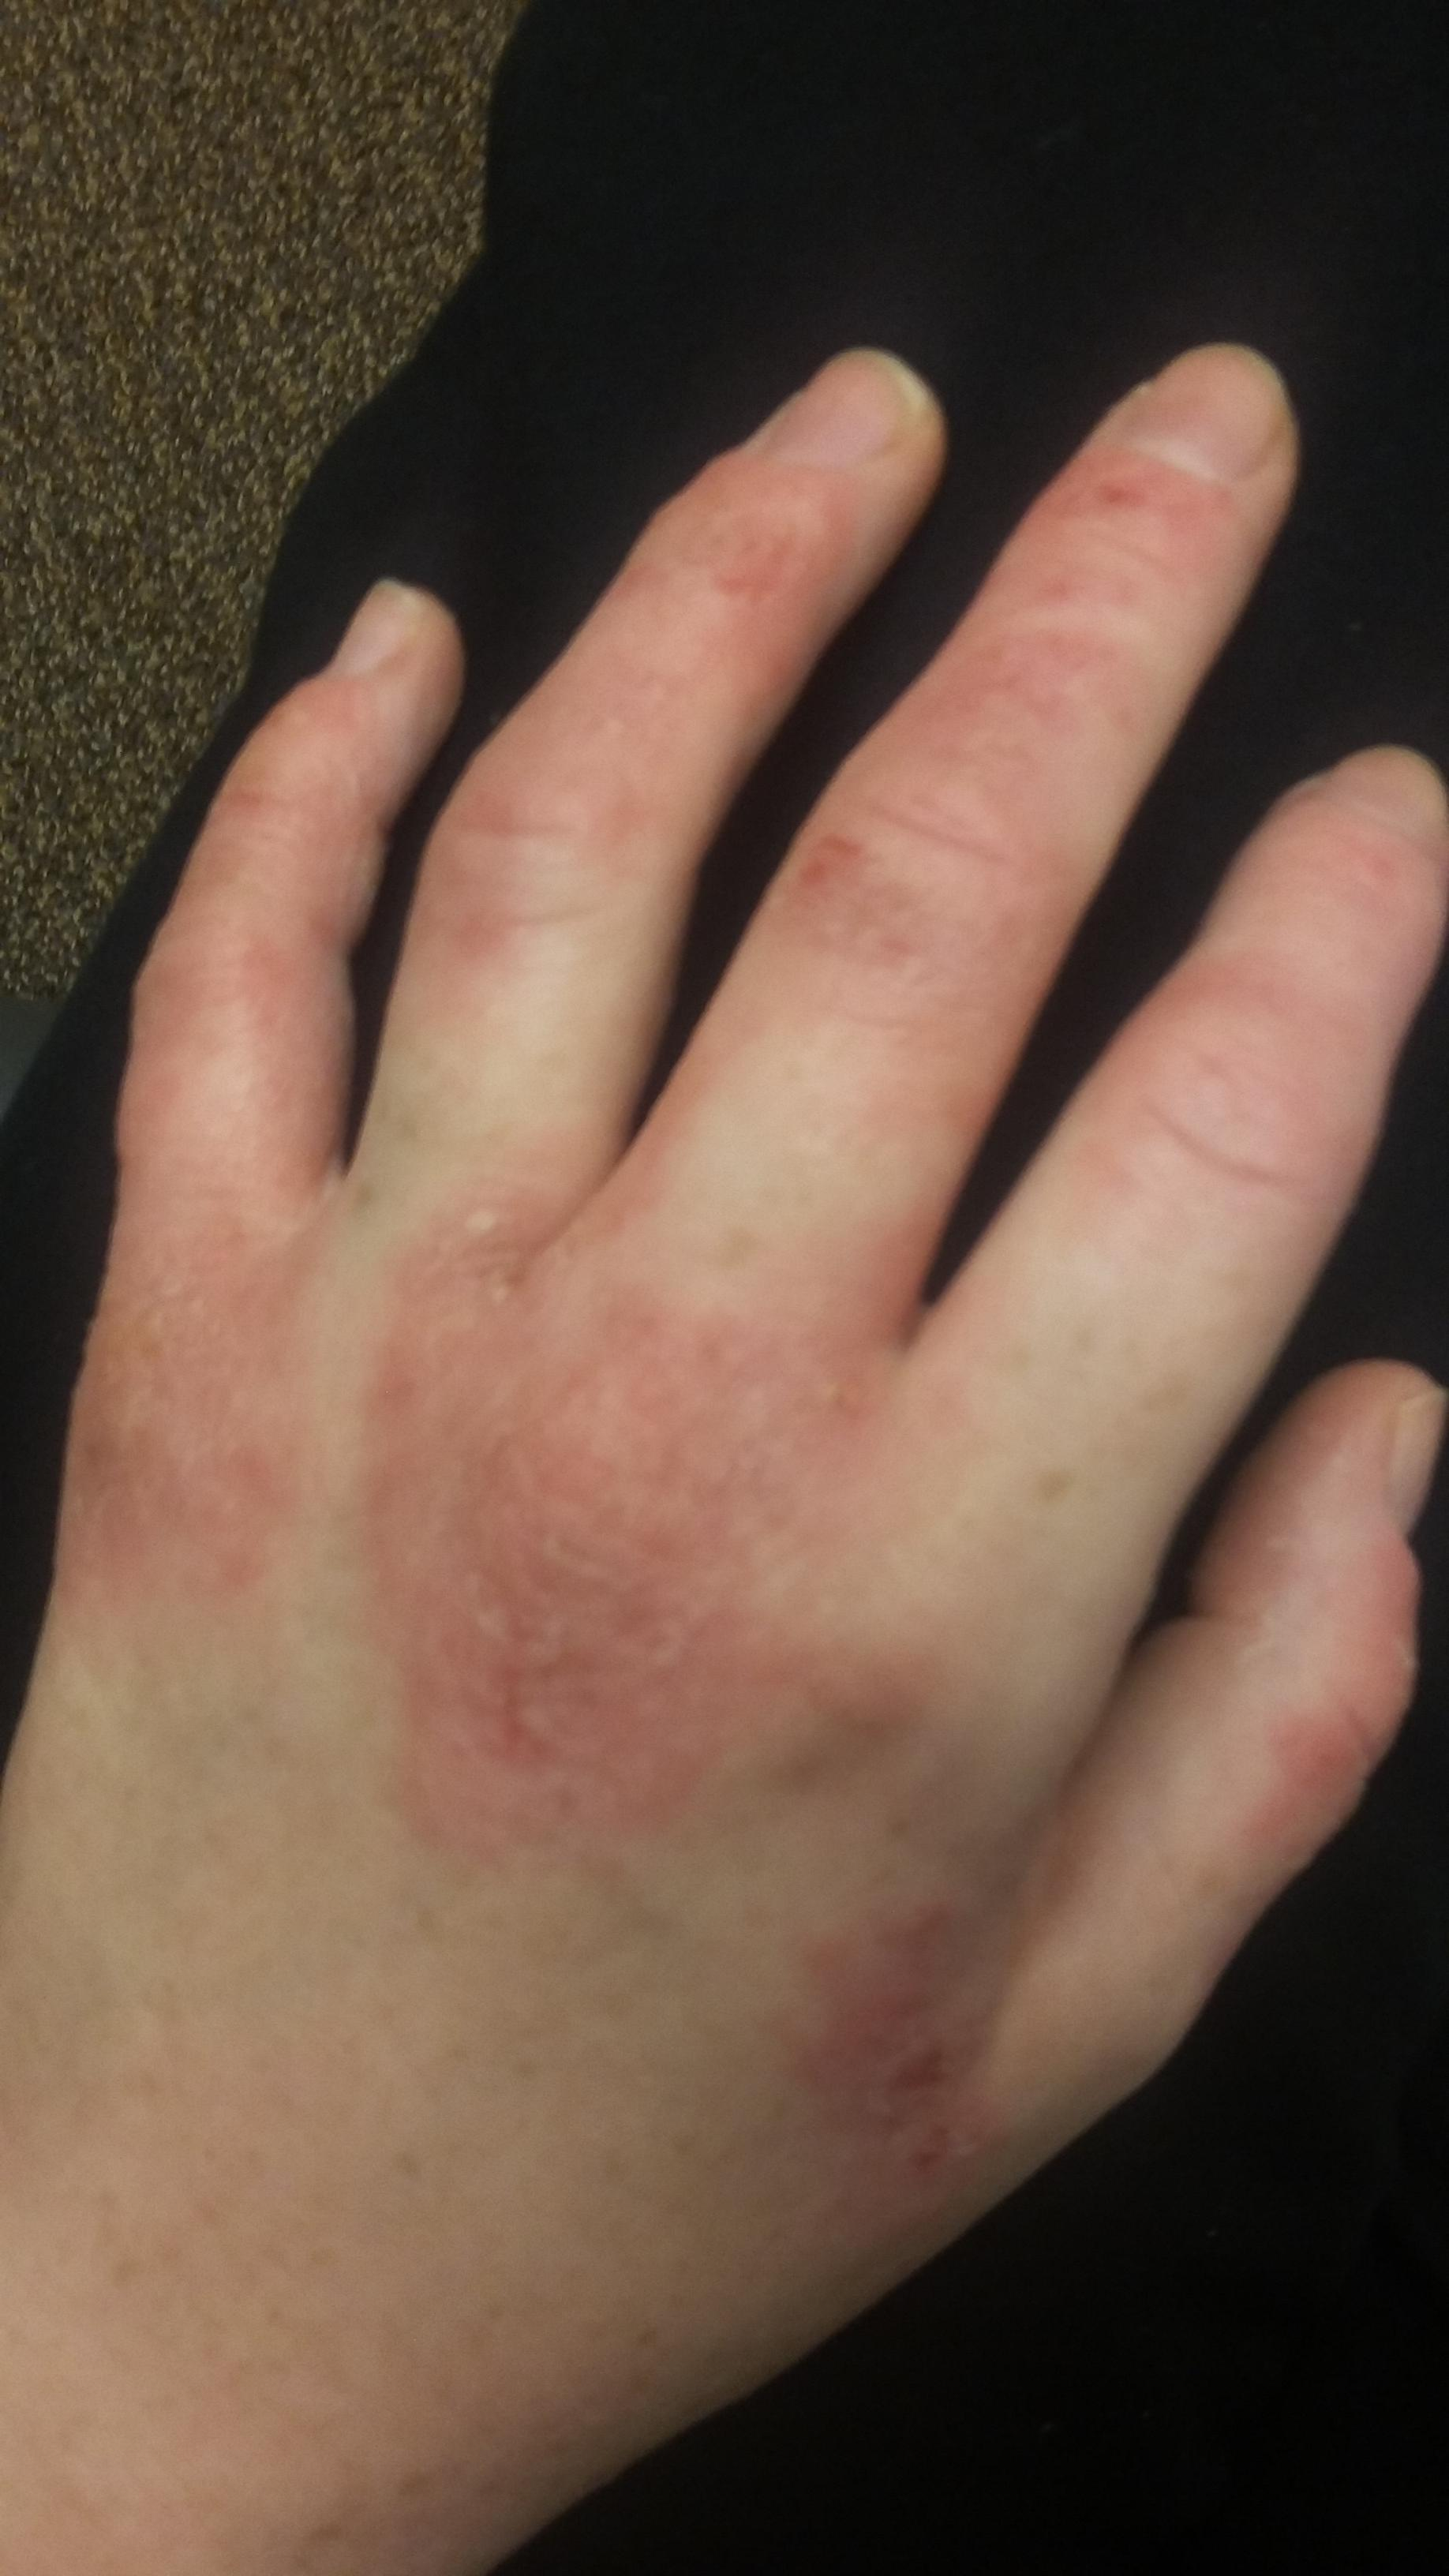

In [62]:
display.Image(filename=f"/content/example_images/example_1.jpg", width=600)

Shown above are the images of hands from the website imgur. These images show a paper sign for the game rock paper scissors.

In [56]:
#Infer On Directory
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/example_images/example_0.jpg: 192x320 1 paper, 64.0ms
image 2/2 /content/example_images/example_1.jpg: 320x192 1 paper, 65.5ms
Speed: 0.9ms pre-process, 64.7ms inference, 329.5ms NMS per image at shape (1, 3, 320, 320)
Resu

In [59]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8

for i,txt_file in enumerate(os.listdir("/content/yolov5/runs/predict-seg/exp/labels")):
  with open(os.path.join("runs/predict-seg/exp/labels",txt_file), 'r') as fid:
    for line in fid:
      label, x1, y1, x2, y2, conf = line.split(" ")[-6:]
      conf = float(line.split(" ")[-1])
      print(conf)
      if conf < MIN_CONF_THRESHOLD:
        print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
        #Upload via Roboflow pip package
        project.upload(os.path.join(example_image_dir,f'example_{i}.jpg'))
        break
      print(f"Image example_{i} has a high confidence prediction")

0.82474
Image example_0 has a high confidence prediction
0.647023
Image has a low confidence prediction, uploading to project: example_1.jpg


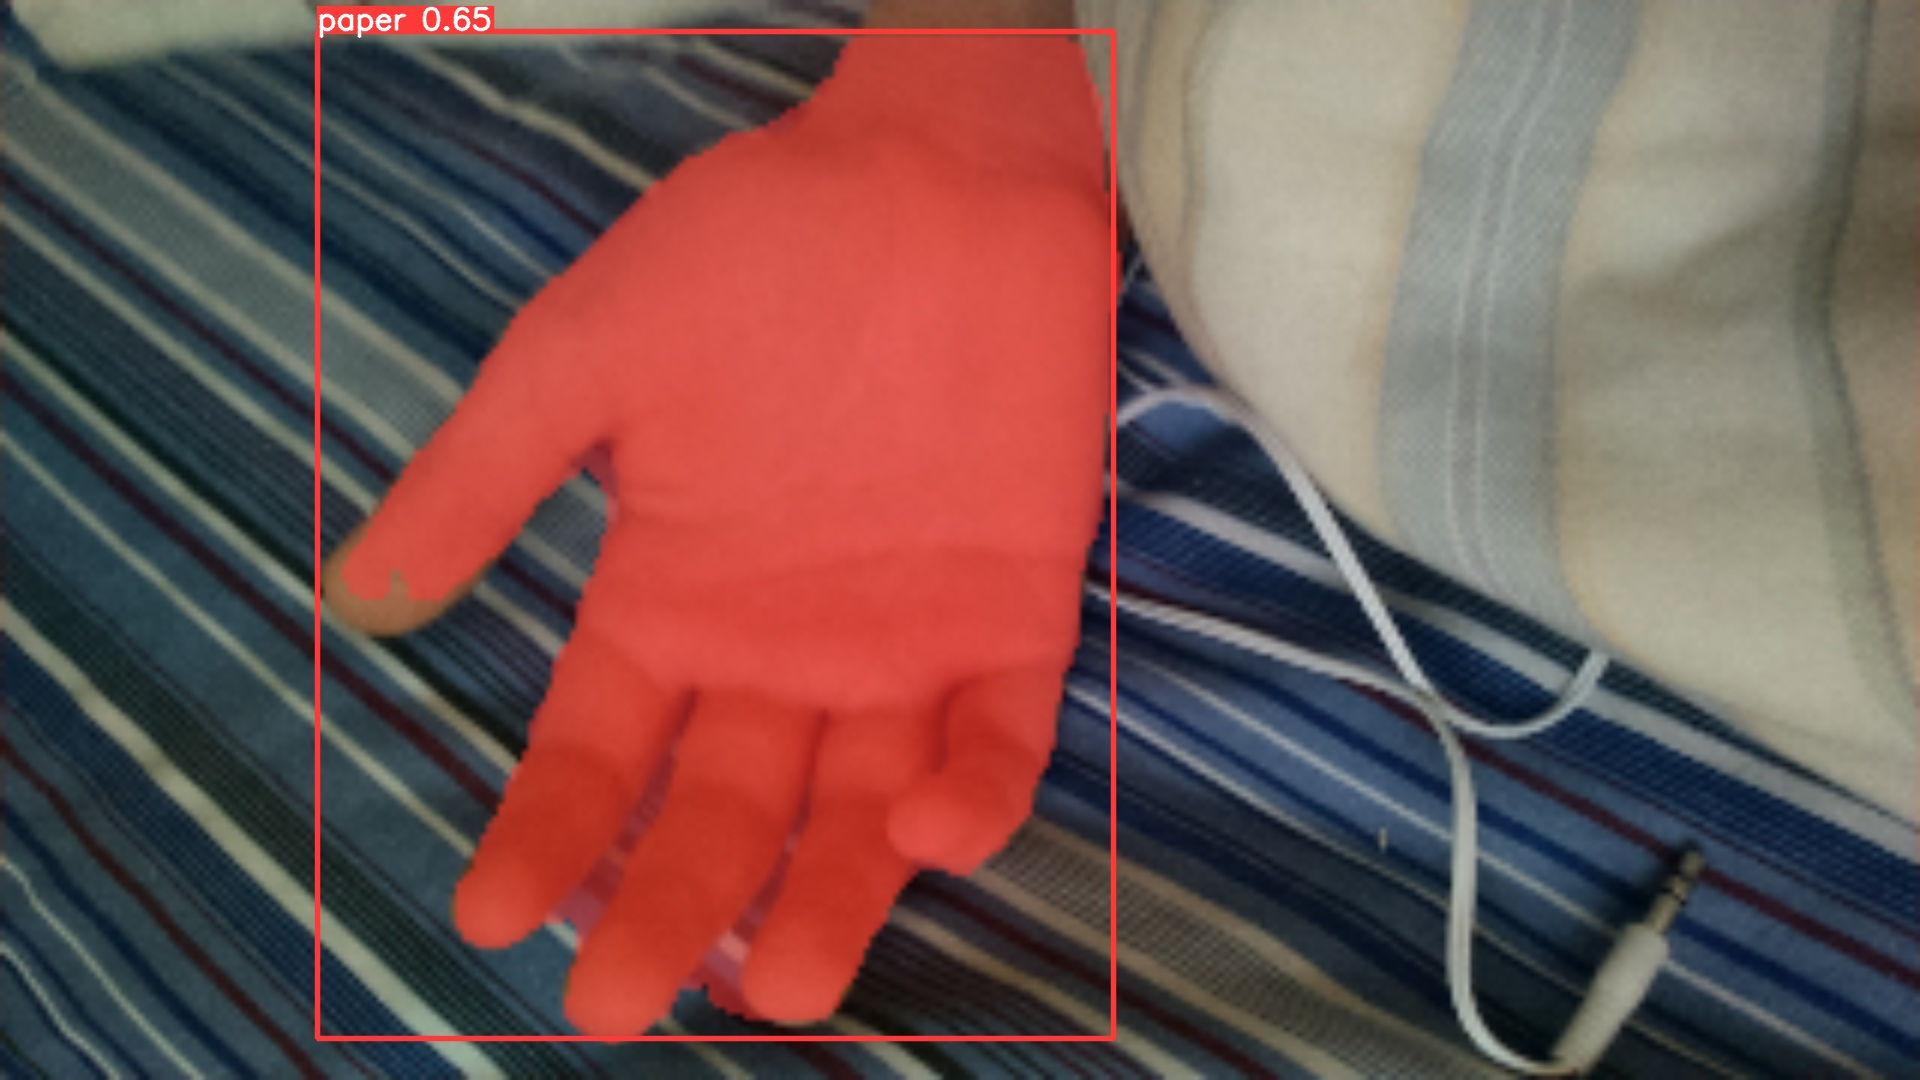

In [61]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp/example_0.jpg", width=600)

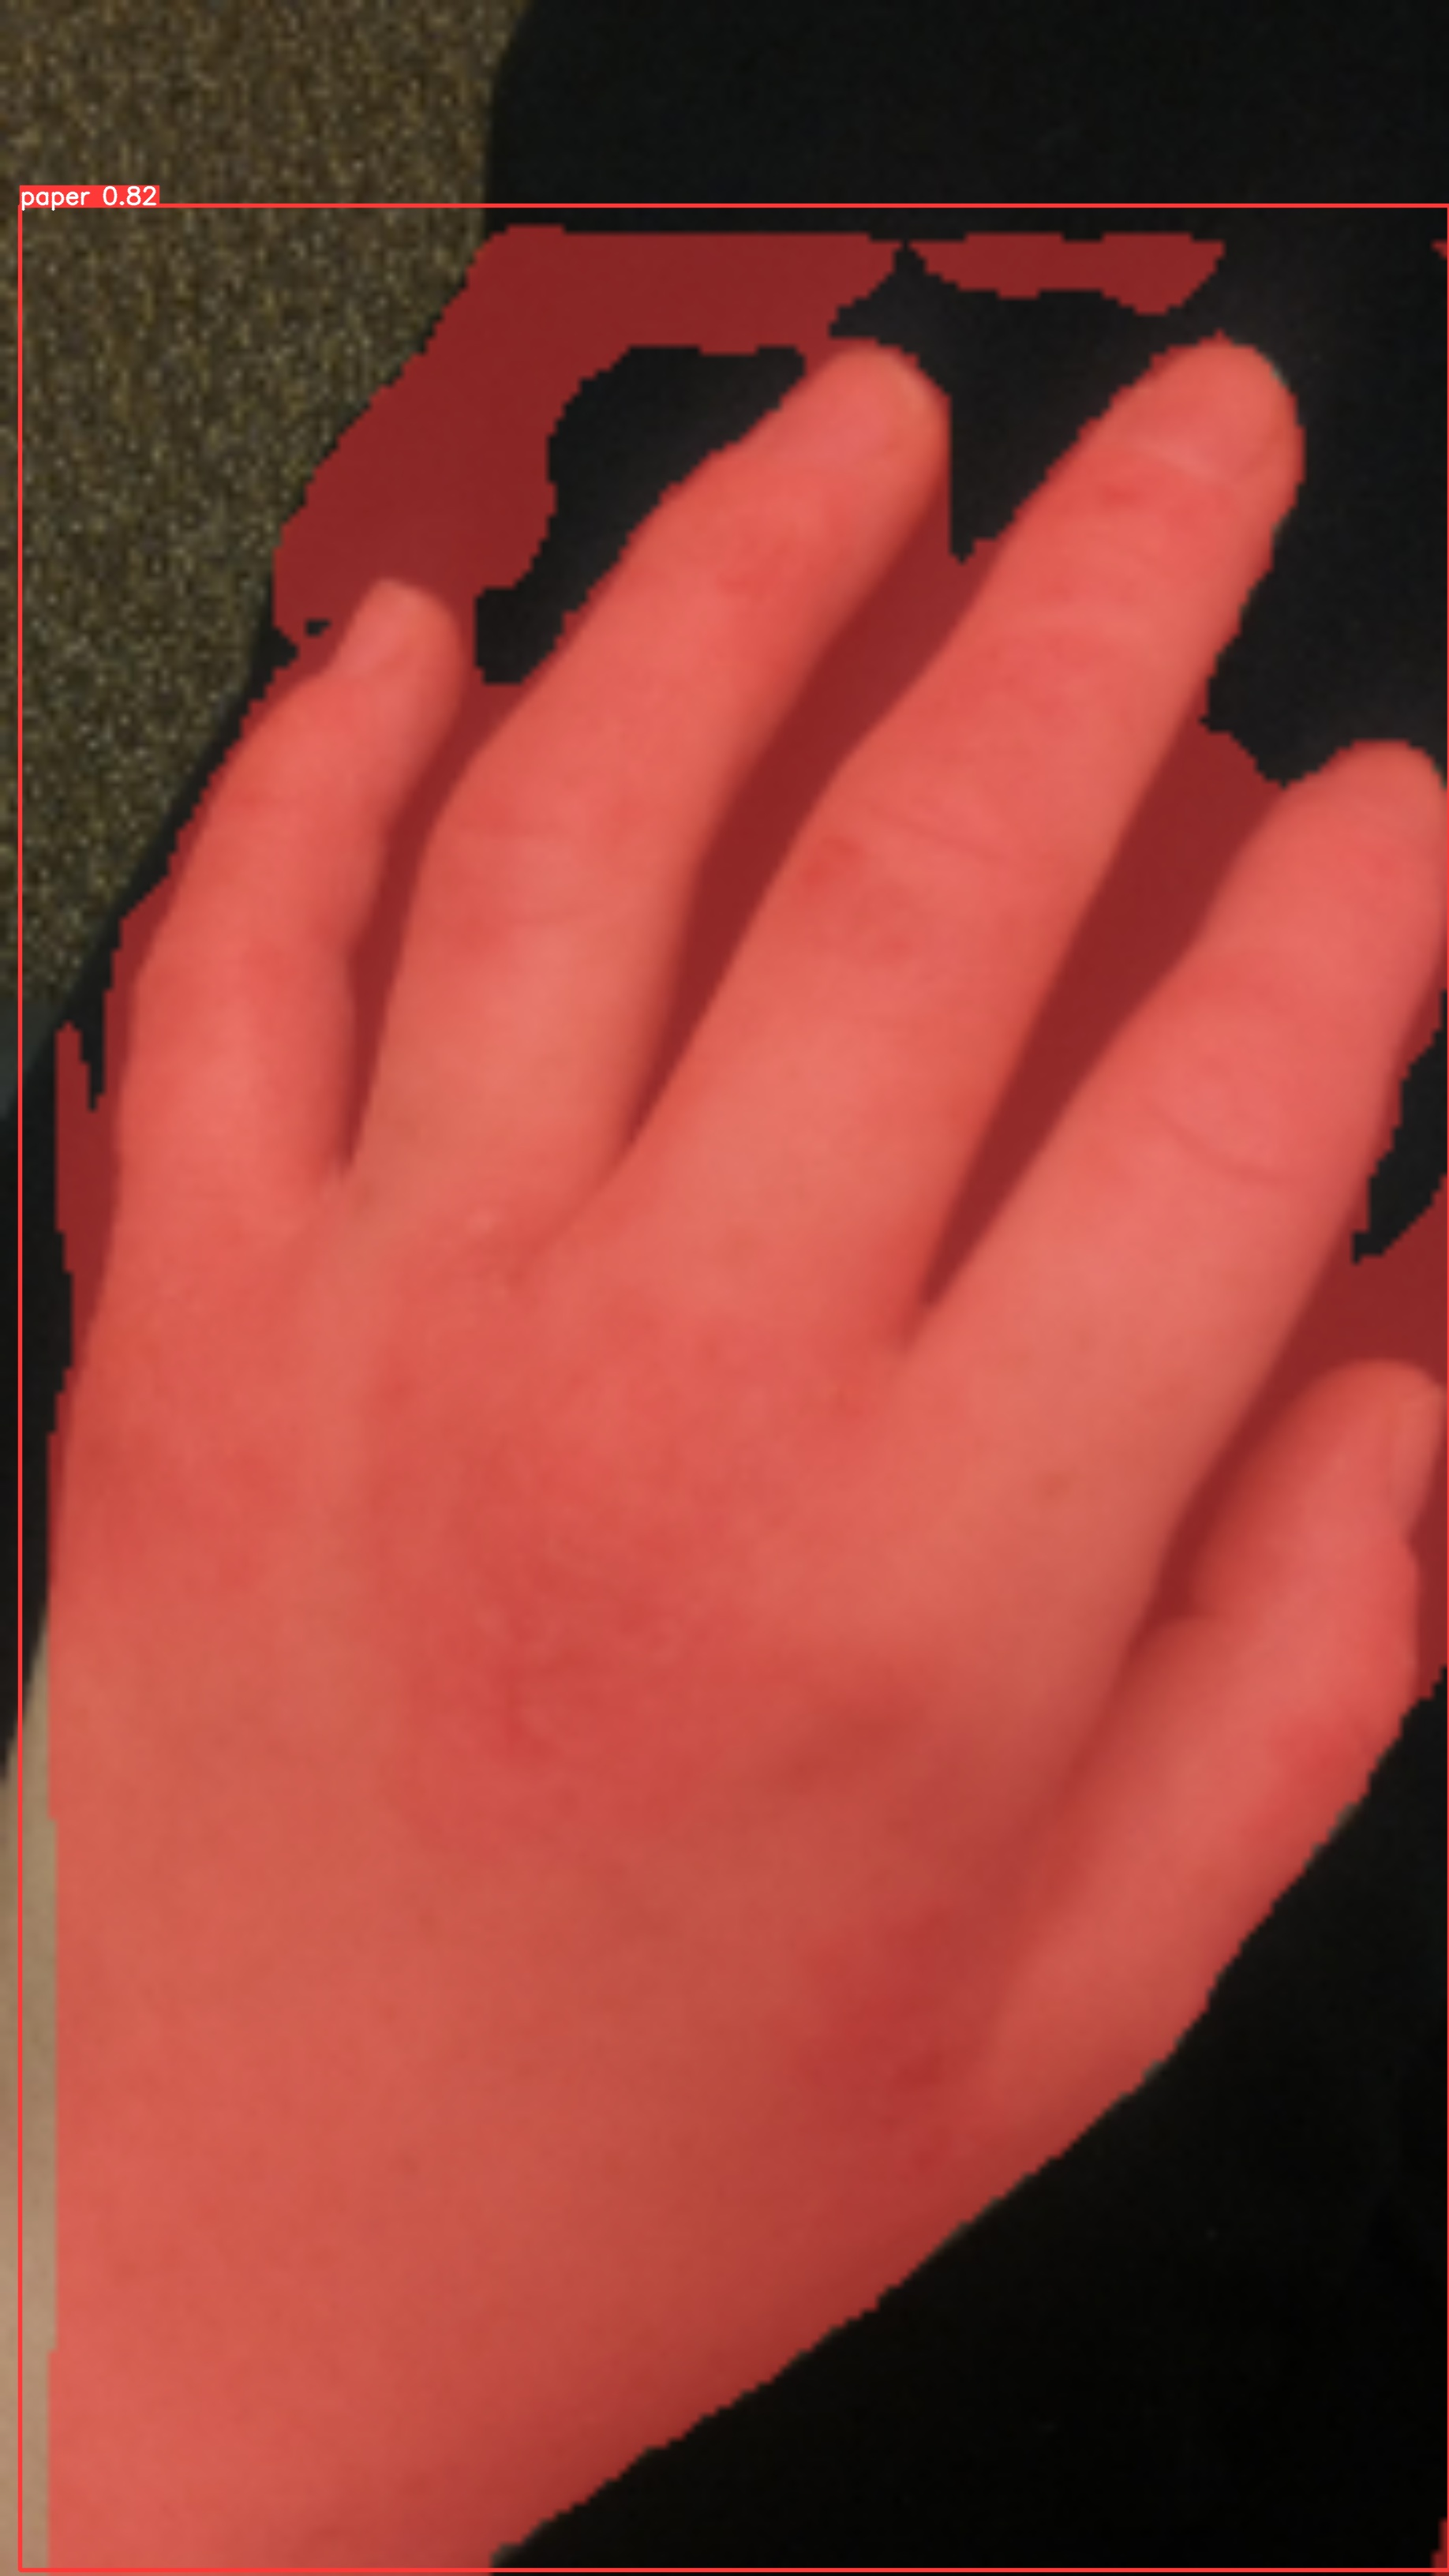

In [60]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp/example_1.jpg", width=600)

Both of them were classified correctly. The other one have higher confidence. However, it is noticeable that there are misplaced classified pixels as hand.

## Conclusion

There are different ways to measure how well a computer program does this job. For instance segmentation, mAP  tells us how accurate the program is at finding and labeling objects in pictures. Then there's IoU, which checks how closely the program's labels match the actual outlines of objects. F1 Score gives us a balanced grade for the program's performance, considering both how many objects it finds correctly and how many it misses. 

Metrics such as mAP, IoU, and F1 score can help us understand how good the program is at recognizing and outlining objects in pictures, kind of like how we might evaluate someone's skill at doing the same task. 

For semantic segmentation, similar metrics are used, but they focus more on understanding what's in the whole picture rather than individual objects. So, it's about how well the program can correctly label different parts of the picture, like grass, sky, or trees, instead of just finding specific objects.

Classification allows us to label each image; segmentation allow us to select the object by its pixel; and instance segmentation allows us to select each object in the image pixel by pixel.

In the notebook, the instance segmentation was done at an image of a zebra at high accuracy. Different people were also segmented with a bus behind them. This shows that the model was able to detect each object pixel by pixel accurately. In my custom model, I tried to use a hand paper scissor hand detector. It was trained with about 1000 images. After 100 epochs, it has above 80% mAP. The model was able to detect and instance segment the hand above an accuracy of 80% in training images and validation image.